In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


2025-09-05 20:34:06.147808: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-05 20:34:06.158314: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-05 20:34:06.258051: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-05 20:34:06.335364: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757082846.425902   57843 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757082846.45

In [3]:

# load data
(x,y),(x_test,y_test)=mnist.load_data()
x_train= x[:50000]
y_train= y[:50000]

x_val= x[50000:]
y_val= y[50000:]


print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_val shape: {x_val.shape}')
print(f'y_val shape: {y_val.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')





x_train shape: (50000, 28, 28)
y_train shape: (50000,)
x_val shape: (10000, 28, 28)
y_val shape: (10000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [7]:
model = Sequential([
  Flatten(input_shape = (28,28)),
  Dense(16,activation='relu'),
  Dense(32,activation='relu'),
  Dense(64,activation='relu'),
  Dense(32,activation='relu'),
  Dense(16,activation='relu'),
  Dense(10,activation='softmax')
])

model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=50,batch_size=32, validation_data=(x_val,y_val))


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2748 - loss: 2.1489 - val_accuracy: 0.7952 - val_loss: 0.6914
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8387 - loss: 0.5539 - val_accuracy: 0.9100 - val_loss: 0.3343
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9080 - loss: 0.3282 - val_accuracy: 0.9341 - val_loss: 0.2488
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9315 - loss: 0.2544 - val_accuracy: 0.9385 - val_loss: 0.2382
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9371 - loss: 0.2242 - val_accuracy: 0.9417 - val_loss: 0.2093
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9394 - loss: 0.2080 - val_accuracy: 0.9417 - val_loss: 0.2130
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9471 - loss: 0.1889 - val_accuracy: 0.9467 - val_loss: 0.1973
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9513 - loss: 0.1725 - 

In [8]:
loss,accuracy = model.evaluate(x_test,y_test,verbose=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9467 - loss: 0.2643


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Predicted digit: 6


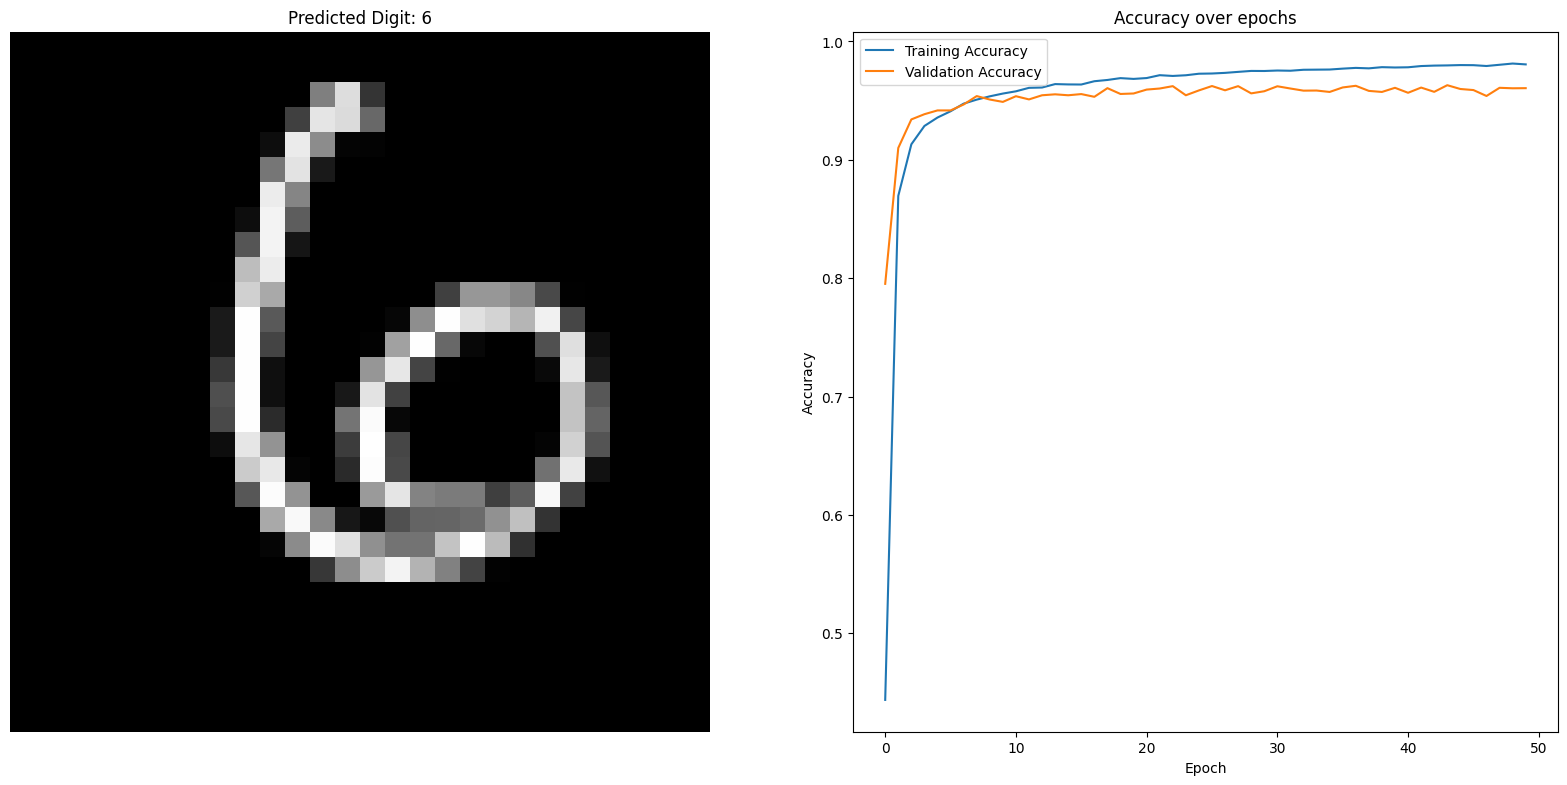

In [9]:

# visualize a sample

test_image = x_test[100] 

prediction = model.predict(test_image[np.newaxis, ...])
predicted_label = np.argmax(prediction)
print("Predicted digit:", predicted_label)

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(test_image, cmap='gray')
plt.title(f'Predicted Digit: {predicted_label}')
plt.axis('off')

plt.subplot(2,2,2)
plt.plot(model.history.history['accuracy'], label='Training Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over epochs')
plt.legend()

plt.show()
